## Stock Market Risk Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
d = pd.read_csv(r"C:\Users\LOKI\Downloads\Market_Risk_Data_coded.csv")
d.head()

,Date,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
0,28-03-2016,217,316,386,114,173
1,04-04-2016,218,302,386,121,171
2,11-04-2016,215,308,374,120,171
3,18-04-2016,223,320,408,122,172
4,25-04-2016,214,319,418,122,175


In [3]:
d.columns = d.columns.str.replace(' ', '_').str.replace('.', '')

In [4]:
d.head()

,Date,ITC_Limited,Bharti_Airtel,Tata_Motors,DLF_Limited,Yes_Bank
0,28-03-2016,217,316,386,114,173
1,04-04-2016,218,302,386,121,171
2,11-04-2016,215,308,374,120,171
3,18-04-2016,223,320,408,122,172
4,25-04-2016,214,319,418,122,175


In [5]:
print('The number of rows (observations) is',d.shape[0],'\n''The number of columns (variables) is',d.shape[1])

The number of rows (observations) is 418 
The number of columns (variables) is 6


In [6]:
d.duplicated().sum()

0

In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           418 non-null    object
 1   ITC_Limited    418 non-null    int64 
 2   Bharti_Airtel  418 non-null    int64 
 3   Tata_Motors    418 non-null    int64 
 4   DLF_Limited    418 non-null    int64 
 5   Yes_Bank       418 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 19.7+ KB


In [8]:
d.describe()

,ITC_Limited,Bharti_Airtel,Tata_Motors,DLF_Limited,Yes_Bank
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,278.964115,528.260766,368.617225,276.827751,124.442584
std,75.114405,226.507879,182.024419,156.280781,130.090884
min,156.000000,261.000000,65.000000,110.000000,11.000000
25%,224.250000,334.000000,186.000000,166.250000,16.000000
50%,265.500000,478.000000,399.500000,213.000000,30.000000
75%,304.000000,706.750000,466.000000,360.500000,249.750000
max,493.000000,1236.000000,1035.000000,928.000000,397.000000


In [9]:
d.isnull().sum()

Date             0
ITC_Limited      0
Bharti_Airtel    0
Tata_Motors      0
DLF_Limited      0
Yes_Bank         0
dtype: int64

### Lets us plot & see price trend over time for different companies

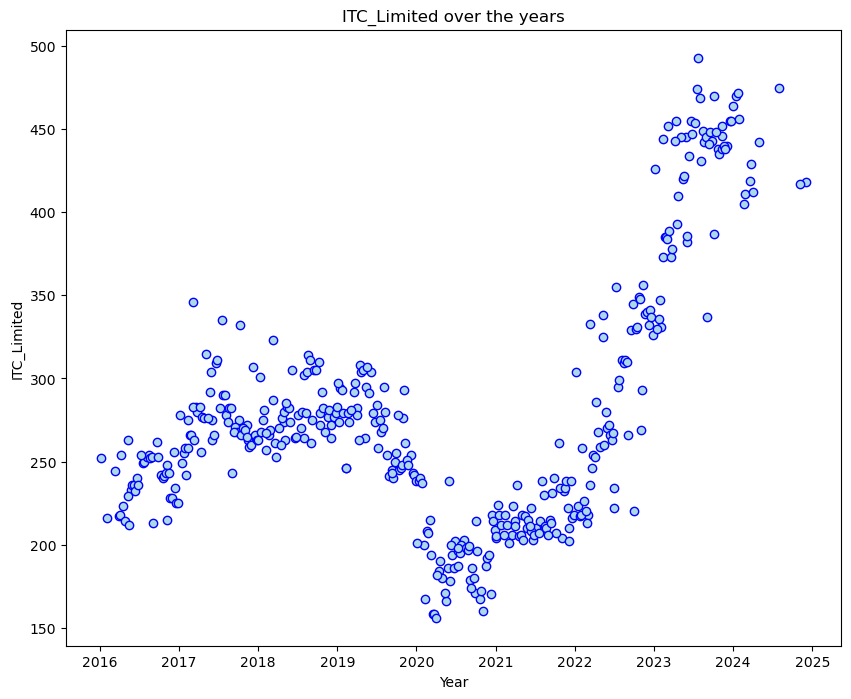

In [10]:
plt.figure(figsize = (10, 8))
d['dates'] = [pd.to_datetime(d) for d in d['Date']]
plt.scatter(d['dates'], d['ITC_Limited'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('ITC_Limited')
plt.title('ITC_Limited over the years')
plt.show()

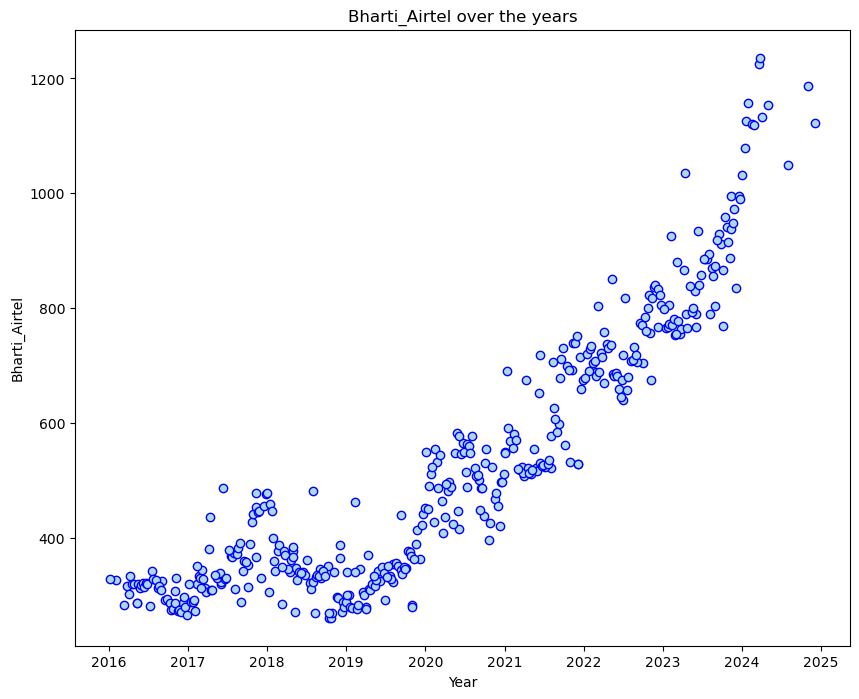

In [11]:
plt.figure(figsize = (10, 8))
d['dates'] = [pd.to_datetime(d) for d in d['Date']]
plt.scatter(d['dates'], d['Bharti_Airtel'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Bharti_Airtel')
plt.title('Bharti_Airtel over the years')
plt.show()

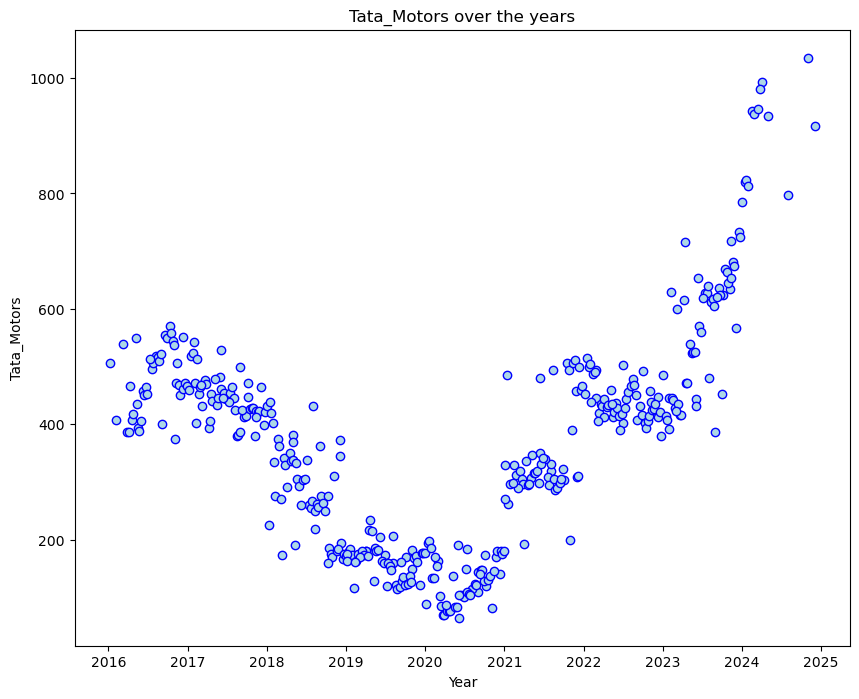

In [12]:
plt.figure(figsize = (10, 8))
d['dates'] = [pd.to_datetime(d) for d in d['Date']]
plt.scatter(d['dates'], d['Tata_Motors'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Tata_Motors')
plt.title('Tata_Motors over the years')
plt.show()

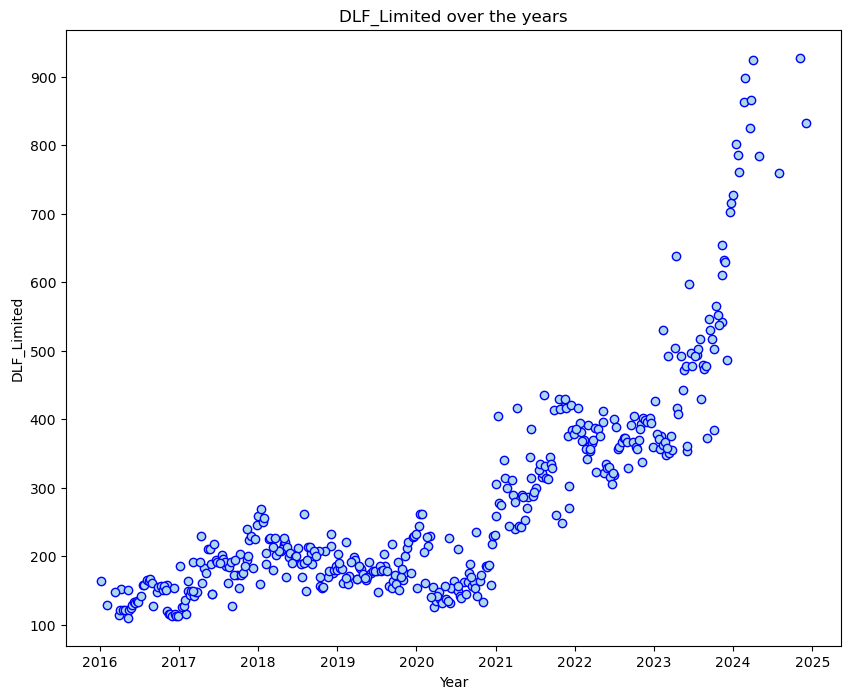

In [13]:
plt.figure(figsize = (10, 8))
d['dates'] = [pd.to_datetime(d) for d in d['Date']]
plt.scatter(d['dates'], d['DLF_Limited'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('DLF_Limited')
plt.title('DLF_Limited over the years')
plt.show()

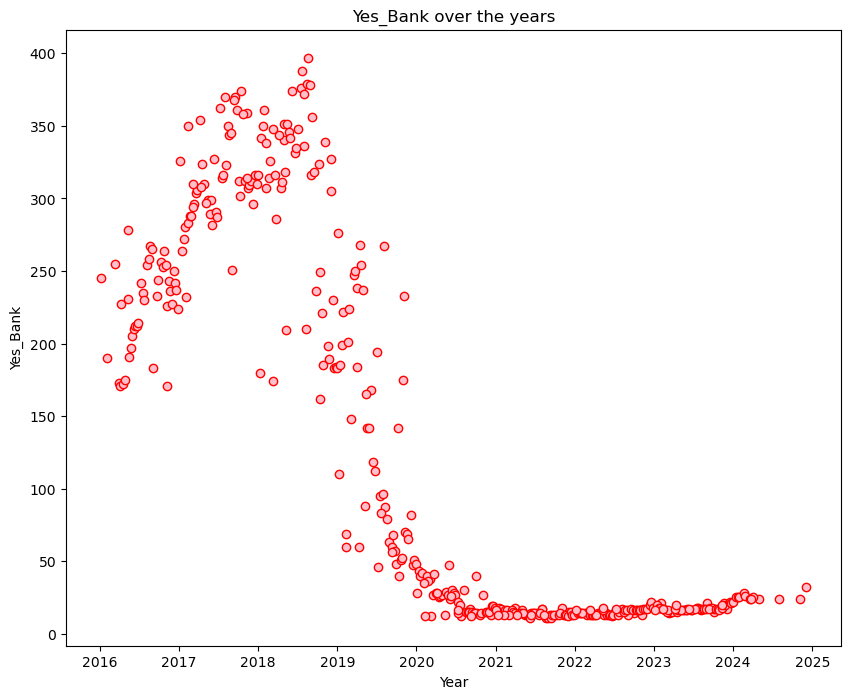

In [14]:
plt.figure(figsize = (10, 8))
d['dates'] = [pd.to_datetime(d) for d in d['Date']]
plt.scatter(d['dates'], d['Yes_Bank'], edgecolors='r', color = 'pink')
plt.xlabel('Year')
plt.ylabel('Yes_Bank')
plt.title('Yes_Bank over the years')
plt.show()

## Analyzing returns

In [15]:
stock_returns = np.log(d.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1) 

In [16]:
stock_returns.head()

,ITC_Limited,Bharti_Airtel,Tata_Motors,DLF_Limited,Yes_Bank
0,NaN,NaN,NaN,NaN,NaN
1,0.004598,-0.045315,0.000000,0.059592,-0.011628
2,-0.013857,0.019673,-0.031582,-0.008299,0.000000
3,0.036534,0.038221,0.087011,0.016529,0.005831
4,-0.041196,-0.003130,0.024214,0.000000,0.017291


### Calculating stock means

In [17]:
stock_means = stock_returns.mean(axis = 0)
stock_means

ITC_Limited      0.001634
Bharti_Airtel    0.003271
Tata_Motors      0.002234
DLF_Limited      0.004863
Yes_Bank        -0.004737
dtype: float64

### Calculating stock standard deviation

In [18]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

ITC_Limited      0.035904
Bharti_Airtel    0.038728
Tata_Motors      0.060484
DLF_Limited      0.057785
Yes_Bank         0.093879
dtype: float64

In [19]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df

,Average,Volatility
ITC_Limited,0.001634,0.035904
Bharti_Airtel,0.003271,0.038728
Tata_Motors,0.002234,0.060484
DLF_Limited,0.004863,0.057785
Yes_Bank,-0.004737,0.093879


### Plotting Mean vs Standard Deviation

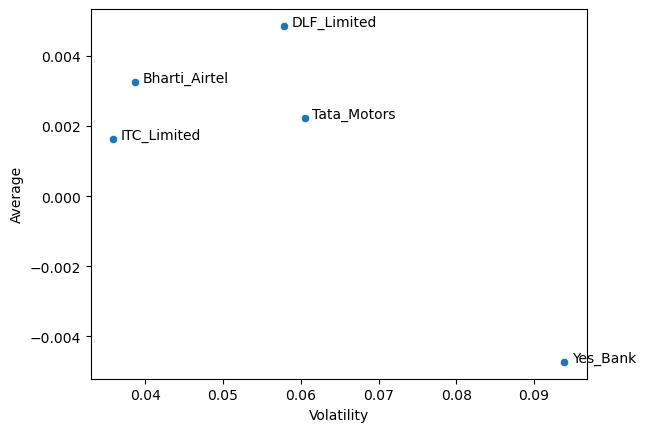

In [20]:
plot = sns.scatterplot(x=df['Volatility'],y=df['Average'])
for stock in df.index:
    plt.text(df.loc[stock, 'Volatility'] + 0.001, df.loc[stock, 'Average'], stock)